In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Number of students
n_students = 200

# Generate features
study_hours = np.clip(np.random.normal(4, 1.5, n_students), 1, 8)
sleep_hours = np.clip(np.random.normal(7, 1.5, n_students), 3, 10)
internet_usage = np.clip(np.random.normal(5, 2, n_students), 0, 10)
attendance_rate = np.random.uniform(60, 100, n_students)
past_grade = np.clip(np.random.normal(12, 4, n_students), 0, 20)


# Categorical variable
participation_levels = ['Low', 'Medium', 'High']
class_participation = np.random.choice(participation_levels, size=n_students, p=[0.3, 0.5, 0.2])

# Map class_participation to numerical impact
participation_score = [0 if level == 'Low' else 1 if level == 'Medium' else 2 for level in class_participation]

# Weighted formula to simulate final grade
final_grade = (
    0.3 * study_hours +
    0.1 * sleep_hours +
    -0.1 * internet_usage +
    0.2 * (attendance_rate / 100 * 20) +
    0.2 * past_grade +
    0.1 * np.array(participation_score) * 5 +
    np.random.normal(0, 2, n_students)  # Noise
)

final_grade = np.clip(final_grade, 0, 20)

ModuleNotFoundError: No module named 'pandas'

In [ ]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    'Study Hours': study_hours,
    'Sleep Hours': sleep_hours,
    'Internet Usage': internet_usage,
    'Attendance Rate': attendance_rate,
    'Past Grade': past_grade,
    'Class Participation': class_participation,
    'Final Grade': final_grade
})

df.head(7)

,Study Hours,Sleep Hours,Internet Usage,Attendance Rate,Past Grade,Class Participation,Final Grade
0,4.745071,7.536681,1.811145,69.170056,9.697449,Medium,6.821002
1,3.792604,7.841177,3.801250,88.890103,12.488039,Medium,8.529851
2,4.971533,8.624577,5.010487,88.801461,20.000000,Low,11.145063
3,6.284545,8.580703,5.093961,85.645905,11.615760,Low,8.974390
4,3.648770,4.933496,4.099869,87.757938,16.597093,High,9.308568
5,3.648795,5.593262,6.245700,81.708978,9.187294,Medium,7.365135
6,6.368819,7.772553,2.864759,70.071962,11.860046,Medium,12.883144


In [ ]:
#for null values
df.isnull().sum()

#convert categorical variable to numerical
df = pd.get_dummies(df, drop_first=True)

#Normalize grades or scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Final Grade', axis=1))

X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['Final Grade']

In [ ]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Training model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test)
print("R2 Score:", r2_score(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions, squared=False))

R2 Score: 0.23490045472805998
Mean Squared Error: 1.907693616041849


/usr/lib/python3/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

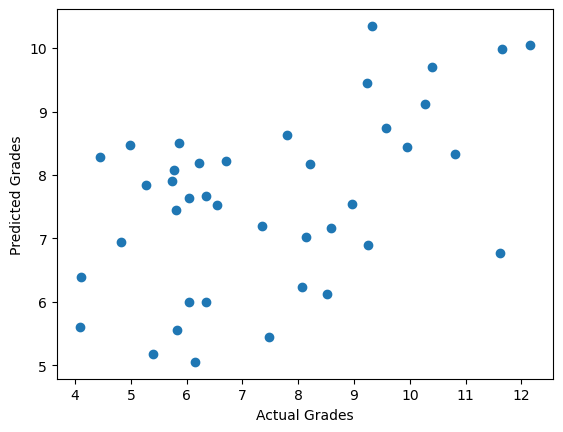

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title
plt.show